In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import ast
from collections import defaultdict
from tqdm import tqdm

# Set the path to the directory containing the subfolders
parent_directory = './runs'

# This list will hold all the numbers found
successes = {}
times = {}
args = {}
# Regular expression to find numbers
number_pattern = re.compile(r'\d+')


In [30]:

all_files = list(os.walk(parent_directory))
for root, dirs, files in tqdm(all_files):
    for file in files:
        if file.endswith(".log"):  # Checks if the file is a log file
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                args[file] = ast.literal_eval(lines[1])
                for i, line in enumerate(lines):
                    if line.startswith("Solved:"):
                        successes[file] = int(("True" in lines[i].strip()))
                    if(line.startswith("Time:")):
                        times[file] = float(lines[i].strip().replace("Time: ", ""))
                if(file not in times or file not in successes):
                    print(file_path)


  1%|          | 38/4513 [00:00<00:23, 188.68it/s]

./runs/prm-12--20240423-050345/1713863033.7066772/1713863033.7077446.log
./runs/prm-38--20240423-090338/1713877426.8189125/1713877426.820403.log
./runs/prm-18--20240423-031841/1713856738.0781896/1713856738.0794022.log
./runs/prm-26--20240423-031841/1713856735.3041794/1713856735.308174.log
./runs/prm-72--20240423-011704/1713849432.7819595/1713849432.7831068.log
./runs/prm-36--20240422-231237/1713841977.0367825/1713841977.0377276.log
./runs/prm-22--20240422-222024/1713838853.2427597/1713838853.243575.log
./runs/prm-94--20240423-011704/1713849457.9113228/1713849457.9144256.log
./runs/prm-33--20240423-090339/1713877426.8492527/1713877426.8510077.log


  2%|▏         | 77/4513 [00:00<00:24, 183.66it/s]

./runs/prm-11--20240423-041336/1713860033.1429355/1713860033.1446424.log
./runs/prm-11--20240423-072326/1713871425.911454/1713871425.9128718.log
./runs/prm-16--20240423-022245/1713853380.4582934/1713853380.459514.log
./runs/prm-34--20240423-055621/1713866189.0657933/1713866189.0673232.log
./runs/prm-64--20240423-063721/1713868649.5806231/1713868649.5823352.log
./runs/prm-56--20240423-090339/1713877427.0059366/1713877427.00792.log
./runs/prm-68--20240423-090339/1713877426.868265/1713877426.8694234.log
./runs/prm-95--20240423-022245/1713853383.249181/1713853383.2503626.log
./runs/prm-8--20240423-090338/1713877438.5032012/1713877438.5045524.log
./runs/prm-53--20240423-003439/1713846897.3229399/1713846897.3245108.log
./runs/prm-63--20240423-013245/1713850382.9047358/1713850382.9132254.log
./runs/prm-12--20240422-213713/1713836240.9877226/1713836240.9887915.log


  3%|▎         | 115/4513 [00:00<00:24, 182.21it/s]

./runs/prm-73--20240423-022245/1713853383.2103145/1713853383.2117136.log
./runs/prm-6--20240422-231237/1713841977.242365/1713841977.243688.log
./runs/prm-92--20240423-031842/1713856734.3687863/1713856734.3705409.log
./runs/prm-60--20240423-002458/1713846305.8658595/1713846305.867418.log
./runs/prm-5--20240422-234643/1713844011.4198773/1713844011.4213057.log
./runs/prm-93--20240423-082008/1713874816.8960762/1713874816.8977876.log
./runs/prm-86--20240423-002458/1713846315.5165625/1713846315.517721.log
./runs/prm-74--20240423-031842/1713856734.2009249/1713856734.2031279.log
./runs/prm-31--20240423-033026/1713857444.0319219/1713857444.0333064.log
./runs/prm-78--20240422-223234/1713839572.1657178/1713839572.167155.log
./runs/prm-77--20240423-050345/1713863045.8758273/1713863045.877537.log
./runs/prm-58--20240423-051847/1713863944.317726/1713863944.3192346.log


  3%|▎         | 157/4513 [00:00<00:22, 194.18it/s]

./runs/prm-43--20240423-031841/1713856735.404306/1713856735.4055254.log
./runs/prm-17--20240423-011704/1713849432.2945683/1713849432.2957387.log
./runs/prm-79--20240422-222024/1713838832.1028144/1713838832.1038868.log
./runs/prm-47--20240422-222024/1713838832.213688/1713838832.214807.log
./runs/prm-5--20240423-023537/1713854156.083479/1713854156.084863.log
./runs/prm-71--20240422-234643/1713844029.1264627/1713844029.1353881.log
./runs/prm-80--20240422-222024/1713838832.2484858/1713838832.250075.log
./runs/prm-72--20240422-231237/1713841964.5192583/1713841964.5209239.log
./runs/prm-1--20240423-082008/1713874816.6229448/1713874816.6244807.log
./runs/prm-86--20240423-041337/1713860034.6484585/1713860034.6559615.log


  4%|▍         | 197/4513 [00:01<00:22, 191.69it/s]

./runs/prm-86--20240423-072327/1713871425.8683226/1713871425.870384.log
./runs/prm-47--20240423-051847/1713863942.2293072/1713863942.230532.log
./runs/prm-7--20240423-022245/1713853380.4425077/1713853380.443954.log
./runs/prm-35--20240423-073847/1713872339.3243477/1713872339.3255978.log
./runs/prm-60--20240423-072327/1713871414.5223222/1713871414.5237327.log
./runs/prm-60--20240423-041337/1713860025.0247872/1713860025.0266566.log
./runs/prm-76--20240423-042347/1713860644.4193892/1713860644.4209378.log
./runs/prm-41--20240423-002458/1713846306.537809/1713846306.5393758.log
./runs/prm-50--20240423-023537/1713854153.814984/1713854153.8164837.log
./runs/prm-61--20240423-050346/1713863034.2730205/1713863034.2747679.log
./runs/prm-87--20240423-050346/1713863045.7134418/1713863045.7184994.log
./runs/prm-99--20240423-002458/1713846305.1644075/1713846305.1655583.log
./runs/prm-10--20240423-033026/1713857443.8857367/1713857443.886836.log
./runs/prm-55--20240423-031842/1713856740.4908757/17138567

  5%|▌         | 237/4513 [00:01<00:22, 193.38it/s]

./runs/prm-3--20240423-050345/1713863033.7267826/1713863033.7282257.log
./runs/prm-33--20240422-213713/1713836240.8810213/1713836240.88198.log
./runs/prm-52--20240423-022245/1713853373.5704741/1713853373.5718467.log
./runs/prm-9--20240423-031841/1713856738.228597/1713856738.230048.log
./runs/prm-24--20240423-002458/1713846305.8087928/1713846305.8097517.log
./runs/prm-6--20240423-011704/1713849432.197796/1713849432.1988378.log
./runs/prm-31--20240423-082008/1713874816.2326365/1713874816.234245.log
./runs/prm-29--20240423-003439/1713846892.1012318/1713846892.1038914.log
./runs/prm-20--20240423-063721/1713868655.022038/1713868655.0235848.log


  6%|▌         | 277/4513 [00:01<00:22, 189.56it/s]

./runs/prm-30--20240423-072326/1713871413.8276808/1713871413.8296793.log
./runs/prm-30--20240423-041336/1713860024.6891897/1713860024.6904216.log
./runs/prm-5--20240423-073847/1713872344.53626/1713872344.537553.log
./runs/prm-17--20240422-231237/1713841977.436585/1713841977.4377277.log
./runs/prm-53--20240423-011704/1713849432.6941073/1713849432.6953676.log
./runs/prm-29--20240422-231237/1713841977.0333085/1713841977.0344555.log
./runs/prm-33--20240423-050345/1713863045.828917/1713863045.830093.log
./runs/prm-27--20240423-090338/1713877427.007161/1713877427.0089161.log
./runs/prm-39--20240423-031841/1713856735.3423204/1713856735.3443074.log
./runs/prm-3--20240422-213713/1713836241.0064719/1713836241.0073533.log


  7%|▋         | 337/4513 [00:01<00:22, 185.61it/s]

./runs/prm-78--20240423-022245/1713853383.1937997/1713853383.195403.log
./runs/prm-41--20240423-041336/1713860024.570129/1713860024.572028.log
./runs/prm-41--20240423-072326/1713871414.2486513/1713871414.2500954.log
./runs/prm-68--20240423-013245/1713850382.903699/1713850382.9086313.log
./runs/prm-99--20240423-041336/1713860023.649183/1713860023.651606.log
./runs/prm-6--20240423-051847/1713863942.8254042/1713863942.8274117.log
./runs/prm-99--20240423-072326/1713871413.8361633/1713871413.837926.log
./runs/prm-58--20240423-003439/1713846897.3435125/1713846897.3445177.log
./runs/prm-63--20240423-090339/1713877427.001482/1713877427.0028965.log
./runs/prm-3--20240423-090338/1713877438.5101404/1713877438.5116878.log
./runs/prm-84--20240423-042347/1713860644.4179542/1713860644.419252.log
./runs/prm-93--20240423-050346/1713863045.728182/1713863045.7298596.log


  8%|▊         | 377/4513 [00:02<00:22, 184.78it/s]

./runs/prm-55--20240423-002458/1713846306.2517226/1713846306.2527852.log
./runs/prm-74--20240423-041337/1713860034.6484194/1713860034.6556776.log
./runs/prm-74--20240423-072327/1713871425.8830621/1713871425.8844206.log
./runs/prm-42--20240423-050345/1713863045.7875016/1713863045.78894.log
./runs/prm-92--20240423-072327/1713871425.8194673/1713871425.8243496.log
./runs/prm-92--20240423-041337/1713860034.6484525/1713860034.6558454.log
./runs/prm-53--20240423-051847/1713863944.2813492/1713863944.2835758.log
./runs/prm-80--20240422-231237/1713841977.54302/1713841977.544494.log
./runs/prm-94--20240422-222024/1713838832.0324917/1713838832.0338197.log
./runs/prm-58--20240422-231237/1713841964.6281376/1713841964.6291857.log
./runs/prm-22--20240423-011704/1713849432.2988713/1713849432.2997887.log
./runs/prm-66--20240422-231237/1713841965.365214/1713841965.3661165.log
./runs/prm-13--20240423-031841/1713856738.2508385/1713856738.2519405.log
./runs/prm-44--20240423-073847/1713872339.4174573/1713872

  9%|▉         | 419/4513 [00:02<00:20, 195.70it/s]

./runs/prm-19--20240423-050345/1713863033.5532508/1713863033.5549877.log
./runs/prm-27--20240423-050345/1713863045.7936497/1713863045.7953842.log
./runs/prm-87--20240422-211829/1713835116.9872947/1713835116.988945.log
./runs/prm-17--20240422-222024/1713838853.2309115/1713838853.2342455.log
./runs/prm-61--20240422-211829/1713835117.175536/1713835117.1767933.log
./runs/prm-79--20240423-011704/1713849457.9113488/1713849457.920622.log
./runs/prm-23--20240423-022245/1713853380.504631/1713853380.5060055.log
./runs/prm-24--20240423-041336/1713860033.1884127/1713860033.189972.log
./runs/prm-24--20240423-072326/1713871425.816509/1713871425.8215082.log
./runs/prm-33--20240423-013245/1713850382.9807994/1713850382.982995.log
./runs/prm-61--20240423-033026/1713857443.4605277/1713857443.4617264.log
./runs/prm-25--20240423-082008/1713874816.4827309/1713874816.4840913.log
./runs/prm-29--20240422-222023/1713838832.1489556/1713838832.1505861.log
./runs/prm-87--20240423-033026/1713857445.0735478/17138574

 10%|█         | 463/4513 [00:02<00:20, 200.52it/s]

./runs/prm-36--20240422-222023/1713838832.1562097/1713838832.1571283.log
./runs/prm-11--20240423-002458/1713846305.8248653/1713846305.8257468.log
./runs/prm-20--20240423-055621/1713866189.2652164/1713866189.2666576.log
./runs/prm-19--20240423-090339/1713877438.530477/1713877438.531958.log
./runs/prm-15--20240423-063721/1713868655.0418382/1713868655.0437558.log
./runs/prm-80--20240423-011704/1713849457.9114182/1713849457.9209213.log
./runs/prm-13--20240423-042346/1713860644.9457629/1713860644.9475164.log
./runs/prm-58--20240423-011704/1713849432.7597492/1713849432.7608252.log
./runs/prm-66--20240423-011704/1713849432.6179955/1713849432.619742.log
./runs/prm-22--20240422-231237/1713841977.202042/1713841977.2034552.log
./runs/prm-8--20240422-213713/1713836241.0605981/1713836241.0618274.log
./runs/prm-32--20240423-031841/1713856735.3041844/1713856735.3079922.log


 11%|█         | 505/4513 [00:02<00:20, 196.41it/s]

./runs/prm-38--20240423-050345/1713863045.716334/1713863045.7211907.log
./runs/prm-47--20240422-231237/1713841977.105681/1713841977.1070993.log
./runs/prm-55--20240423-072327/1713871414.7393663/1713871414.7410696.log
./runs/prm-55--20240423-041337/1713860024.9716508/1713860024.9730558.log
./runs/prm-92--20240423-002458/1713846315.558719/1713846315.5597897.log
./runs/prm-100--20240423-031841/1713856734.4297414/1713856734.4312763.log
./runs/prm-60--20240423-031842/1713856740.4119232/1713856740.4135203.log
./runs/prm-6--20240422-222024/1713838853.2309215/1713838853.2354114.log
./runs/prm-54--20240423-050346/1713863034.225752/1713863034.2273214.log
./runs/prm-86--20240423-031842/1713856734.2009275/1713856734.203673.log


 12%|█▏        | 549/4513 [00:02<00:19, 201.54it/s]

./runs/prm-74--20240423-002458/1713846315.4933302/1713846315.494544.log
./runs/prm-2--20240423-031841/1713856738.2241945/1713856738.225648.log
./runs/prm-59--20240423-022245/1713853373.8110769/1713853373.812272.log
./runs/prm-67--20240423-022245/1713853373.5667102/1713853373.5678656.log
./runs/prm-77--20240423-013245/1713850373.4124725/1713850373.4133244.log
./runs/prm-8--20240423-050345/1713863033.7043862/1713863033.705638.log
./runs/prm-7--20240422-223234/1713839562.0171804/1713839562.0181224.log
./runs/prm-49--20240423-013245/1713850382.9036624/1713850382.908519.log
./runs/prm-42--20240423-090339/1713877426.9012794/1713877426.9031672.log
./runs/prm-81--20240423-022245/1713853383.1425254/1713853383.1438937.log
./runs/prm-36--20240423-031841/1713856735.3604913/1713856735.3623726.log
./runs/prm-61--20240423-073847/1713872344.7268407/1713872344.7286756.log
./runs/prm-87--20240423-073847/1713872344.7181199/1713872344.721139.log
./runs/prm-13--20240423-051847/1713863942.7721987/1713863942

 13%|█▎        | 591/4513 [00:03<00:19, 196.51it/s]

./runs/prm-84--20240423-011704/1713849457.9121525/1713849457.9241464.log
./runs/prm-26--20240422-231237/1713841977.1210568/1713841977.122019.log
./runs/prm-29--20240423-042346/1713860644.9499652/1713860644.9513872.log
./runs/prm-62--20240423-011704/1713849432.6880276/1713849432.6891286.log
./runs/prm-18--20240422-231237/1713841977.2387123/1713841977.2400703.log
./runs/prm-44--20240422-211829/1713835148.4792798/1713835148.4807434.log
./runs/prm-25--20240422-234643/1713844011.6193056/1713844011.6204798.log
./runs/prm-24--20240423-055621/1713866189.3003023/1713866189.3017528.log
./runs/prm-67--20240422-213713/1713836257.015939/1713836257.0213382.log
./runs/prm-32--20240422-222023/1713838832.168148/1713838832.1696937.log
./runs/prm-15--20240423-002458/1713846305.8100855/1713846305.8111157.log


 14%|█▍        | 631/4513 [00:03<00:20, 191.04it/s]

./runs/prm-9--20240423-011704/1713849432.2843761/1713849432.2852151.log
./runs/prm-63--20240423-022245/1713853373.653232/1713853373.6548328.log
./runs/prm-100--20240422-222024/1713838830.9115305/1713838830.9130085.log
./runs/prm-6--20240423-031841/1713856738.2181754/1713856738.2193415.log
./runs/prm-41--20240423-055621/1713866189.2357593/1713866189.2371576.log
./runs/prm-3--20240422-223234/1713839562.0639274/1713839562.0646718.log
./runs/prm-78--20240423-090339/1713877438.2975757/1713877438.3003402.log
./runs/prm-85--20240423-022245/1713853383.1296868/1713853383.132678.log
./runs/prm-2--20240422-222024/1713838853.2309175/1713838853.2344227.log
./runs/prm-96--20240423-002458/1713846315.603081/1713846315.6039512.log
./runs/prm-64--20240423-031842/1713856740.4374347/1713856740.4386847.log
./runs/prm-88--20240423-050346/1713863045.7376451/1713863045.738996.log


 15%|█▍        | 673/4513 [00:03<00:20, 186.05it/s]

./runs/prm-61--20240423-023537/1713854153.7237427/1713854153.7250683.log
./runs/prm-83--20240423-082008/1713874817.0012605/1713874817.0027483.log
./runs/prm-82--20240423-031842/1713856734.3983102/1713856734.4002.log
./runs/prm-70--20240423-002458/1713846306.1964114/1713846306.197738.log
./runs/prm-51--20240423-072327/1713871414.7208946/1713871414.7225986.log
./runs/prm-51--20240423-041337/1713860024.73782/1713860024.739676.log
./runs/prm-8--20240423-022245/1713853380.52702/1713853380.528482.log
./runs/prm-68--20240422-223234/1713839570.5087252/1713839570.509492.log
./runs/prm-89--20240423-072327/1713871425.8824103/1713871425.8837147.log
./runs/prm-76--20240423-051847/1713863943.6040068/1713863943.6169956.log
./runs/prm-89--20240423-041337/1713860034.648452/1713860034.657694.log


 16%|█▌        | 711/4513 [00:03<00:21, 177.15it/s]

./runs/prm-87--20240422-234643/1713844011.4204514/1713844011.4218686.log
./runs/prm-48--20240422-222024/1713838832.1524217/1713838832.1537173.log
./runs/prm-76--20240422-222024/1713838832.2138462/1713838832.2153597.log
./runs/prm-4--20240423-002458/1713846305.826428/1713846305.8272374.log
./runs/prm-90--20240422-222024/1713838832.4126558/1713838832.4137144.log
./runs/prm-18--20240423-011704/1713849432.4004042/1713849432.4013255.log
./runs/prm-70--20240423-041337/1713860024.8629084/1713860024.8642054.log
./runs/prm-70--20240423-072327/1713871414.6119673/1713871414.613413.log
./runs/prm-25--20240423-073847/1713872339.4313073/1713872339.4325726.log
./runs/prm-77--20240422-223234/1713839572.1234603/1713839572.1264305.log
./runs/prm-96--20240423-072327/1713871425.918912/1713871425.9203866.log


 17%|█▋        | 747/4513 [00:03<00:22, 169.71it/s]

./runs/prm-49--20240422-223234/1713839570.4792309/1713839570.4801831.log
./runs/prm-46--20240423-050345/1713863045.8127306/1713863045.814421.log
./runs/prm-96--20240423-041337/1713860034.6484473/1713860034.6559348.log
./runs/prm-69--20240423-051847/1713863944.3015206/1713863944.3031156.log
./runs/prm-89--20240423-002458/1713846315.5106227/1713846315.5117145.log
./runs/prm-71--20240423-050346/1713863034.3382268/1713863034.3395274.log
./runs/prm-58--20240423-042347/1713860645.1247644/1713860645.1262984.log
./runs/prm-51--20240423-002458/1713846306.161242/1713846306.162006.log
./runs/prm-9--20240422-231237/1713841977.1900694/1713841977.1911697.log
./runs/prm-81--20240423-090339/1713877438.51911/1713877438.5205781.log
./runs/prm-84--20240423-003439/1713846897.1391585/1713846897.1416602.log


 17%|█▋        | 783/4513 [00:04<00:22, 164.09it/s]

./runs/prm-45--20240423-041336/1713860024.7170255/1713860024.7182724.log
./runs/prm-45--20240423-072326/1713871414.3252616/1713871414.3266222.log
./runs/prm-2--20240423-051847/1713863942.7878006/1713863942.7890375.log
./runs/prm-67--20240423-090339/1713877427.0126529/1713877427.014278.log
./runs/prm-21--20240423-082008/1713874816.6507723/1713874816.6521685.log
./runs/prm-34--20240423-002458/1713846306.5657353/1713846306.5668993.log
./runs/prm-19--20240423-022245/1713853380.4915125/1713853380.4927597.log
./runs/prm-75--20240423-023538/1713854154.3469732/1713854154.348504.log
./runs/prm-20--20240423-041336/1713860033.113928/1713860033.1151717.log
./runs/prm-78--20240422-213713/1713836257.017192/1713836257.0299737.log
./runs/prm-20--20240423-072326/1713871425.872547/1713871425.8739588.log


 18%|█▊        | 821/4513 [00:04<00:20, 176.34it/s]

./runs/prm-30--20240423-063721/1713868656.954086/1713868656.9553554.log
./runs/prm-93--20240423-023538/1713854154.3531792/1713854154.354917.log
./runs/prm-13--20240422-222024/1713838853.2802644/1713838853.280997.log
./runs/prm-65--20240422-211829/1713835117.1419055/1713835117.1429188.log
./runs/prm-5--20240422-211828/1713835116.2678063/1713835116.269316.log
./runs/prm-39--20240422-231237/1713841977.1679888/1713841977.16958.log
./runs/prm-29--20240423-031841/1713856735.515502/1713856735.5174.log
./runs/prm-40--20240423-073847/1713872339.2991564/1713872339.3005295.log
./runs/prm-17--20240423-031841/1713856738.2418034/1713856738.2432892.log
./runs/prm-23--20240423-050345/1713863033.7518933/1713863033.753092.log
./runs/prm-41--20240423-063721/1713868657.0260146/1713868657.0273533.log


 19%|█▉        | 857/4513 [00:04<00:21, 173.54it/s]

./runs/prm-76--20240423-003439/1713846897.244638/1713846897.2456331.log
./runs/prm-8--20240422-223234/1713839562.1361642/1713839562.1369612.log
./runs/prm-7--20240423-050345/1713863033.7157247/1713863033.716915.log
./runs/prm-78--20240423-013245/1713850373.196005/1713850373.197294.log
./runs/prm-74--20240423-055621/1713866194.1942058/1713866194.1959126.log
./runs/prm-95--20240423-090339/1713877438.4607906/1713877438.4628172.log
./runs/prm-68--20240423-022245/1713853373.6450064/1713853373.646344.log
./runs/prm-56--20240423-022245/1713853373.550019/1713853373.551268.log
./runs/prm-45--20240423-002458/1713846306.652824/1713846306.653982.log
./runs/prm-89--20240423-031842/1713856734.4365447/1713856734.4374835.log
./runs/prm-65--20240423-050346/1713863034.1387217/1713863034.1404815.log


 20%|██        | 913/4513 [00:04<00:20, 173.03it/s]

./runs/prm-83--20240423-050346/1713863045.8904505/1713863045.8925889.log
./runs/prm-9--20240422-222024/1713838853.2821252/1713838853.2827437.log
./runs/prm-51--20240423-031842/1713856740.341618/1713856740.345654.log
./runs/prm-43--20240423-051847/1713863942.1610107/1713863942.1622767.log
./runs/prm-82--20240423-041337/1713860034.6484656/1713860034.656118.log
./runs/prm-82--20240423-072327/1713871425.9682634/1713871425.970012.log
./runs/prm-3--20240423-022245/1713853380.4229665/1713853380.4296253.log
./runs/prm-31--20240423-073847/1713872339.304686/1713872339.3059113.log
./runs/prm-85--20240422-223234/1713839572.1234596/1713839572.1257544.log
./runs/prm-4--20240423-072326/1713871425.8650284/1713871425.8673706.log
./runs/prm-64--20240423-072327/1713871414.6859193/1713871414.6871989.log
./runs/prm-4--20240423-041336/1713860033.2120082/1713860033.2133682.log
./runs/prm-64--20240423-041337/1713860024.763341/1713860024.7650197.log
./runs/prm-75--20240422-234643/1713844011.4768398/1713844011.

 21%|██        | 936/4513 [00:05<00:19, 184.17it/s]

./runs/prm-84--20240422-222024/1713838832.189778/1713838832.191155.log
./runs/prm-90--20240422-231237/1713841977.5593793/1713841977.560945.log
./runs/prm-5--20240423-082008/1713874816.2948465/1713874816.2962039.log
./runs/prm-37--20240423-050345/1713863045.8037033/1713863045.8053608.log


KeyboardInterrupt: 

In [28]:
print(len(times))
print(len(successes))
print(len(args))

plot_points = {}
plot_successes = defaultdict(list)
plot_times = defaultdict(list)
for key in times:
    plot_successes[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(successes[key])
    plot_times[(args[key]["min_samples"], args[key]["max_samples"], args[key]["adaptive_n"])].append(times[key])

974
974
2256


16


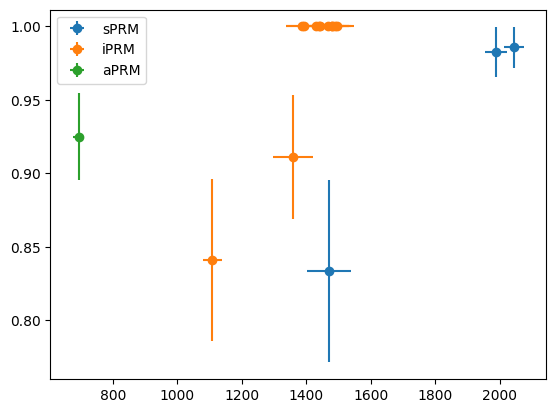

In [36]:

print(len(plot_times))
plt.figure()
legend = ["sPRM", "iPRM", "aPRM"]
# Plot the sPRM results
for condition in legend:
    xs = []
    ys = []
    x_errs = []
    y_errs = []
    ns = []
    for k in plot_successes:
        min_samples, max_samples, adaptive_n = k
        
        if((condition == "iPRM" and (min_samples != max_samples-1 and not adaptive_n)) or
           (condition == "sPRM" and (min_samples == max_samples-1 and not adaptive_n)) or
           (condition == "aPRM" and (adaptive_n))):
            xs.append(np.mean(plot_times[k]))
            ys.append(np.mean(plot_successes[k]))
            x_errs.append(np.std(plot_times[k])/np.sqrt(len(plot_times[k])))
            y_errs.append(np.std(plot_successes[k])/np.sqrt(len(plot_successes[k])))
            ns.append(max_samples)

    plt.errorbar(xs, ys, xerr=x_errs, yerr=y_errs, fmt='o')

plt.legend(legend)
